# Fibonaccijevi brojevi

Leonardo Pisano, poznatiji pod nadimkom Fibonacci, bio je talijanski matematičar kojeg se smatra jednim od največih matematičara u srednjem vijeku na zapadu. Danas je najpoznatiji po tome da je raširio uporabu arapskih brojeva u Europi, te naravno po nizu brojeva kojeg prvi puta spominje u svojoj knjizi Liber Abaci (Knjiga računanja).


In [1]:
from IPython.display import Image
import math 

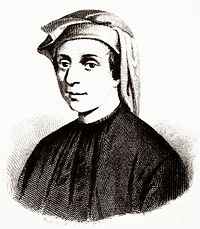

In [2]:
Image ('https://upload.wikimedia.org/wikipedia/commons/thumb/3/35/Fibonacci2.jpg/200px-Fibonacci2.jpg')

U svojoj knjizi Liber Abaci, Fibonaccijev niz brojeva je zapravo rješenje problema razmnožavanja zečevi koji je tamo iznio. Zamislio je hipotetsku situaciju u kojoj promatramo kako brzo se razmnožavaju zečevi u idealnim uvjetima. Pretpostavimo da imamo par zečeva, mužjaka i ženku, koji stavimo na pusti otok. Taj će par zečeva dobiti par mladih zečića svakog prvog dana u mjesecu, jednog muškog i jednog ženskog zečića. Zečevi nikad ne umiru, te se razmnožavaju svakih mjesec dana. Pitanje koje je Fibonacci postavio je kolkiko će biti parova zečeva nakon mjesec dana?

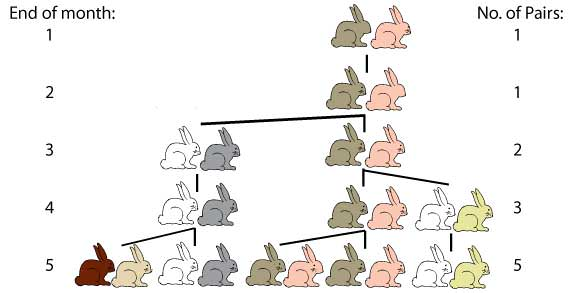

In [3]:
Image ('https://learnodo-newtonic.com/wp-content/uploads/2015/09/Fibonacci-Sequence-in-the-Rabbit-Problem.jpg')

Kao odgovor na postavljeno pitanje dobivamo Fibonaccijev niz brojeva. Taj je niz rekurzivno zadan s sljedećom formulom

\begin{align*}
 F(n) &=
   \begin{cases}
    0        &\text{ za } &n = 0 \\
    1        & \text{ za } &n = 1,2 \\
    F(n-2)+F(n-1)        & \text{inače}
   \end{cases}
 \end{align*}

Fibonaccijeve brojeve možemo zadati i nerekurzivno. Usporedimo brzinu izvođenja svake od funkcija.

In [4]:
def fibo1 (n):
    if (n<2):
        return n;
    else:
        return fibo1(n-2)+fibo1(n-1)
    

In [5]:
fibo1 (0)

0

In [6]:
%timeit fibo1(25)

125 ms ± 34.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
fibo1(2)

1

In [8]:
def fibo2(n):
    x=0
    y=1
    if n==0:
        return 0
    elif n==1:
        return 1
    elif n==2:
        return 1
    for i in range (n):
        z = x + y
        x = y
        y = z
    return y
    

In [9]:
%timeit fibo2(25)

5.2 µs ± 364 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Još jedan od načina pomoću kojeg možemo eksplicitno izraziti vrijednost Fibonaccijevog broja, a za koji se pokazuje da je izuzetno brz jest Binetova formula


$$
 F(n) = \frac{(1+\sqrt5)^n - (1-\sqrt5)^n}{2^n\sqrt5} 
$$

In [10]:
from math import sqrt
def fibo3(n):
    return ((1+sqrt(5))**n-(1-sqrt(5))**n)/(2**n*sqrt(5))

In [11]:
fibo3 (10)

55.000000000000014

In [12]:
%timeit fibo3(25)

2.98 µs ± 679 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Vidimo iz prethodnih primjera da je Binetova formula brža i od rekurzivnog i nerekurzivnog načina zadavanja niza.

In [13]:
def prost_br (n): 
    if n > 1:
        for i in range (2 , n):
            if (n % i == 0):
                return 0
        else:
            return 1

In [14]:
prost_br (17)

1

Usporedimo sada brzinu izvođenja dviju funkcija koje ispisuju listu Fibonaccijevih brojeva. Jednu funkciju ćemo sami napisati, a druga je iz Sympy biblioteke.

In [15]:
def fib(n): # funkcija koja stvara listu fibonaccijevih brojeva
    if n == 0:
        return [0]
    elif n == 1:
        return [0, 1]
    else:
        lista = fib(n-1)
        lista.append(lista[-1] + lista[-2])
        return lista

In [16]:
lista = fib(42)
%timeit lista = fib (42)

40.3 µs ± 7.04 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [17]:
lista

[0,
 1,
 1,
 2,
 3,
 5,
 8,
 13,
 21,
 34,
 55,
 89,
 144,
 233,
 377,
 610,
 987,
 1597,
 2584,
 4181,
 6765,
 10946,
 17711,
 28657,
 46368,
 75025,
 121393,
 196418,
 317811,
 514229,
 832040,
 1346269,
 2178309,
 3524578,
 5702887,
 9227465,
 14930352,
 24157817,
 39088169,
 63245986,
 102334155,
 165580141,
 267914296]

In [18]:
from sympy import fibonacci
%timeit [fibonacci(x) for x in range (42)]

59 µs ± 16.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Vidimo da je funkcija iz biblioteke sympy nešto sporija od naše funkcije, no red veličine je isti ne postoji prevelika razlika kod izvođenja.

In [19]:
prim_lista = list(filter(lambda x: prost_br(x) , lista)) # filtriramo listu fib brojeva i stvaramo novu s prostim fib brojevima

In [20]:
prim_lista

[2, 3, 5, 13, 89, 233, 1597, 28657, 514229]

Primjetimo kako se u Fibonaccijevom nizu pojavljuje dosta članova koji su ujedno i prosti brojevi. Na početku niza su skoro svi članovi prosti, no kako se niz nastavlja prosti fibonaccijevi brojevi su sve rjeđi. Nije poznato ima li beskonačno mnogo prostih fibonaccijevih brojeva.

In [21]:
kvad_lista = list(map(lambda x: x**2, lista))

In [22]:
kvad_lista

[0,
 1,
 1,
 4,
 9,
 25,
 64,
 169,
 441,
 1156,
 3025,
 7921,
 20736,
 54289,
 142129,
 372100,
 974169,
 2550409,
 6677056,
 17480761,
 45765225,
 119814916,
 313679521,
 821223649,
 2149991424,
 5628750625,
 14736260449,
 38580030724,
 101003831721,
 264431464441,
 692290561600,
 1812440220361,
 4745030099481,
 12422650078084,
 32522920134769,
 85146110326225,
 222915410843904,
 583600122205489,
 1527884955772561,
 4000054745112196,
 10472279279564025,
 27416783093579881,
 71778070001175616]

In [23]:
import numpy as np

In [24]:
a = np.array(lista)# pretvara listu u numpy niz, za lakše baratanje
c = np.array(kvad_lista)

In [25]:
a

array([        0,         1,         1,         2,         3,         5,
               8,        13,        21,        34,        55,        89,
             144,       233,       377,       610,       987,      1597,
            2584,      4181,      6765,     10946,     17711,     28657,
           46368,     75025,    121393,    196418,    317811,    514229,
          832040,   1346269,   2178309,   3524578,   5702887,   9227465,
        14930352,  24157817,  39088169,  63245986, 102334155, 165580141,
       267914296])

In [26]:
c

array([                0,                 1,                 1,
                       4,                 9,                25,
                      64,               169,               441,
                    1156,              3025,              7921,
                   20736,             54289,            142129,
                  372100,            974169,           2550409,
                 6677056,          17480761,          45765225,
               119814916,         313679521,         821223649,
              2149991424,        5628750625,       14736260449,
             38580030724,      101003831721,      264431464441,
            692290561600,     1812440220361,     4745030099481,
          12422650078084,    32522920134769,    85146110326225,
         222915410843904,   583600122205489,  1527884955772561,
        4000054745112196, 10472279279564025, 27416783093579881,
       71778070001175616], dtype=int64)

In [27]:
b = np.array([x for x in range(0,43)])

In [28]:
b

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42])

In [29]:
import matplotlib.pyplot as plt

plt.plot(b,c, linewidth =2.0)
plt.title = 'Fibonacci'
plt.show()

Text(0.5,1,'Fibonacci')

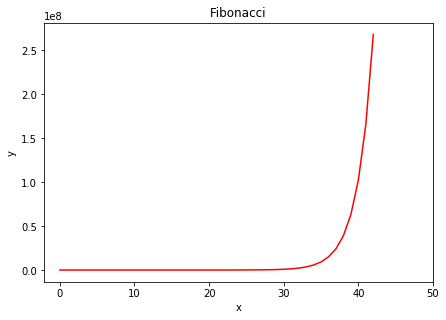

In [30]:
figura = plt.figure()
axes = figura.add_axes([0.1 ,0.1, 0.9, 0.9])
axes.plot (b , a, 'r')
#axes.plot (b , c, 'b')
axes.set_xlabel('x')
axes.set_ylabel('y')
plt.xlim(xmax=50)
axes.set_title('Fibonacci')


Primjetimo kako funkcija raste linearno do otprilike tridesetog člana, nakon čega funkcija eksponencijalno raste. Također vidimo puno brži rast funkcije kvadrata fibonaccijevih brojeva.

## Zlatni rez

Zlatni rez je matematički pojam koji se kroz povijest veže uz skladnost i ljepotu, a pojavljuje se u najrazličitijim  područjima čovjekovog života, od umjetnosti, preko znanosti pa sve do objekata u prirodi.

Definicija "zlatnog reza", bez spominjanja naziva, prvi se put u pisanom obliku navodi prije otprilike 2300. godina u Euklidovim Elementima. Naziv "zlatni rez" koristi se tek od 1835. godine, a predložio ga je njemački matematičar Martin Ohm. "Zlatni rez" definira se na sljedeći način: dvije su veličine $a > b$ u omjeru zlatnog reza, ako se njihov zbroj $a+b$ prema većoj veličini $a$, odnosi kao veća veličina $a$, prema manjoj veličini $b$, odnosno, zapisano matematički

 $$ \frac{a+b}{a} = \frac{a}{b} = \varphi $$


Iz te jednadžbe supstitucijom $\frac{a}{b} = \varphi$  dobivamo jednadžbu $\varphi^2-\varphi -1 =0$.

In [31]:
from sympy import *
from sympy import init_printing

init_printing()

phi = Symbol('phi')
x1, x2 = solve(phi**2 - phi -1, phi)

together([x1, x2])

In [32]:
x1.evalf()

Sada vidimo da vrijedi $\varphi \approx 1.6180339887...$

Fibonaccijevi brojevi i zlatni rez su povezani. Naime, omjer dva uzastopna Fibonaccijeva broja konvergira prema broju $\varphi$ uzastopnim dijeljenjem susjednih članova niza, tj vrijedi $\lim(\frac{F_n}{F_{n-1}})=\varphi$, $n\to\infty$. Sljedeći graf prikazuje tu vezu.

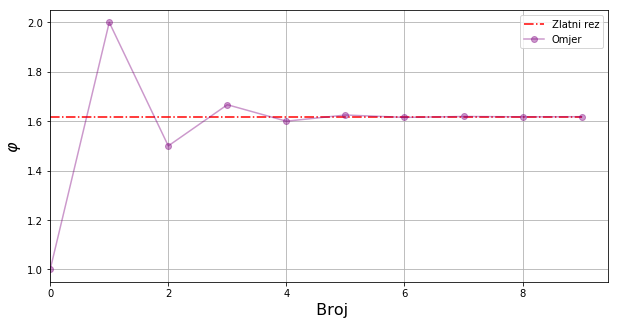

In [33]:
import matplotlib.pyplot as plt
from scipy import constants
from numpy import *
from IPython.core.pylabtools import figsize
%matplotlib inline

x = array([i for i in range(10)])
zlatni_rez = np.empty(10)
zlatni_rez.fill(constants.golden)
figsize(10,5)

omjer = [fibo1(n+1)/fibo1(n) for n in range(1,11)]

plt.figure()
plt.plot(x,zlatni_rez,color="red", ls='-.')
plt.plot(x,omjer, color="purple", ls='-', marker='o',alpha=0.4);
plt.grid()
plt.xlabel(r' Broj', fontsize=16)
plt.ylabel(r'$\varphi$', fontsize=16)
plt.legend(['Zlatni rez', 'Omjer'])
plt.xlim(xmin=0)

plt.show()

Fibonaccijevi brojevi nam mogu biti od koristi kod traženja elemenata u sortiranoj listi.  Naime, ako imamo sortiranu listu elemenata $niz$ i tražimo element $x$ u toj listi, prvo nađemo najmanji Fibonaccijev broj koji je veči ili jednak od duljine zadane liste $n$. Označimo taj broj s $Fib_m$. Sada neka je $Fib_ (m-2)=i$. Gledamo $i$-ti element u listi i njega uspoređujemo s traženim elementom. Ako su jednaki, vraćamo indeks $i$ na kojem se nalazi traženi element. Ako je $x$ veći postupak ponavljamo da podnizu iza indeksa $i$, a ako je manji gledamo podniz prije indeksa $i$. 

In [34]:
def fib_trazenje(niz, x, n):
     
    fibm2 = 0 
    fibm1 = 1 
    fibM = fibm2 + fibm1 #fibM je najmanji fib broj veci ili jednak od n
 
    while (fibM < n):
        fibm2 = fibm1
        fibm1 = fibM
        fibM = fibm2 + fibm1
 
    offset = -1; # varijablom offset oznacujemo dio niza koji odbacujemo
 
    while (fibM > 1):
         
        i = min(offset+fibm2, n-1) #provjera valjanosti indeksa i
 
        if (niz[i] < x):
            fibM = fibm1
            fibm1 = fibm2
            fibm2 = fibM - fibm1
            offset = i
 
        elif (niz[i] > x):
            fibM = fibm2
            fibm1 = fibm1 - fibm2
            fibm2 = fibM - fibm1
 
        else :
            return i
 
    if(fibm1 and niz[offset+1] == x): #usporedba zadnjeg elementa s x
        return offset+1; 
 
    return -1 # ako element nije pronađen

Ovaj algoritam je tipa podjeli i vladaj, a njegova složenost je $O(n) = \log(n)$. Razlika ovog algoritma u odnosu na standarni algoritam binarnog pretraživanja je ta što on dijeli niz na 2 nejednaka djela. Također on pretražuje elemente koji su relativno blizu, tako da nam ovaj algoritam može biti od koristi kod jako velikih nizova.

In [35]:
niz = [10,12,15,17,24,28,42,46,60,100,120,150]
n = len(niz)
x = 100
print("Nalazi se ne mjestu;", fib_trazenje(niz,x,n))

Nalazi se ne mjestu; 9


Fibonaccijeva spirala konstruirana pomoću Matplotlib biblioteke.

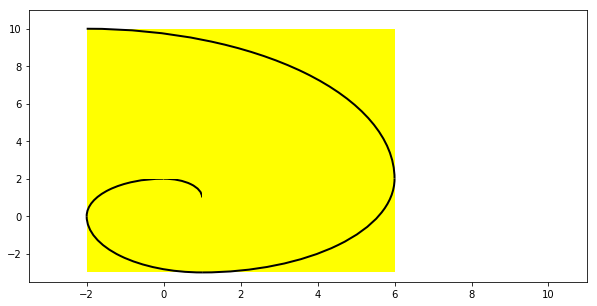

In [43]:
from matplotlib.patches import Rectangle, Arc

vektori = [(1,1), (-1,1), (-1,-1), (1,-1)]
kutevi = [270, 0, 90, 180]

boje = ["yellow"]

kvadrati = [{"origin":(0,0), "length":1},
           {"origin":(1,1), "length":1, "arc_origin":(0,1)},
           {"origin":(0,2), "length":2, "arc_origin":(0,0)},
           {"origin":(-2,0), "length":3, "arc_origin":(1,0)},
           {"origin":(1,-3), "length":5, "arc_origin":(1,2)},
           {"origin":(6,2), "length":8, "arc_origin":(-2,2)}]

for i, sq in enumerate(kvadrati):
    if True:
        #nacrtaj kvadrat
        plt.gca().add_patch(Rectangle(
            sq["origin"], 
            sq["length"]*vektori[i%len(vektori)][0],
            sq["length"]*vektori[i%len(vektori)][1], 
            facecolor=boje[i%len(boje)]
            ))
    if "arc_origin" in sq:
        #nacrtaj luk
        plt.gca().add_patch(Arc(
            sq["arc_origin"], 
            sq["length"]*2, 
            sq["length"]*2, 
            angle = kutevi[i%len(kutevi)],
            theta1 = 0, 
            theta2 = 90, 
            lw = 2
            ))

plt.axis([-3.5, 11, -3.5, 11])          
plt.show()

Kada govorimo o Fibonaccijevim brojevima, moramo spomenuti vezu s binomnim koeficijentima u Pascalovom trokutu. Naime, vrijedi da je suma brojeva na rastućoj dijagonali pod kutem od $45^{\circ}$ u Pascalovom trokutu uvijek Fibonaccijev broj.

In [38]:
from sympy import binomial

for N in range(10):
    print([binomial(N,i) for i in range(N+1)])

[1]
[1, 1]
[1, 2, 1]
[1, 3, 3, 1]
[1, 4, 6, 4, 1]
[1, 5, 10, 10, 5, 1]
[1, 6, 15, 20, 15, 6, 1]
[1, 7, 21, 35, 35, 21, 7, 1]
[1, 8, 28, 56, 70, 56, 28, 8, 1]
[1, 9, 36, 84, 126, 126, 84, 36, 9, 1]


Primjetimo da vrijedi: $$ 1+4+3=8 $$ $$ 1+5+6+1=13 $$ $$ 1+6+10+4=21 $$ $$ 1+7+15+10+1=34 $$ $$ 1+8+21+20+5=55 $$ $$ \dots$$

Koristeći biblioteku Turtle koja je originalno bila dio programskog jezika Logo, konstruirali smo Fibonaccijevu spiralu.

In [36]:
#Fibonaccijeva spirala konstruirana pomocu Turtle Graphics

from turtle import *

fibo_niz = [1,1,2,3, 5, 8, 13, 21, 34,55,89,144]  

def crtaj_kvadrat(duljina_str):  
    for i in range(4):
        forward(duljina_str)
        right(90)

broj_kvadrata=len(fibo_niz)

factor = 3      #koeficijent povecanja
penup()
goto(50,50)     
pendown()
for i in range(broj_kvadrata):
    crtaj_kvadrat(factor*fibo_niz[i]) #nacrtaj kvadrat
    penup()                        
    forward(factor*fibo_niz[i])
    right(90)
    forward(factor*fibo_niz[i])
    pendown()
        
penup()
goto(50,50)      
setheading(0)   
pencolor('red')
pensize(3)
pendown()
#nacrtaj polukrug s fib brojem kao radijusom
for i in range(broj_kvadrata):
    circle(-factor*fibo_niz[i],90)  



Za kraj pogledajmo na koje se sve načine Fibonaccijevi brojevi manifestiraju u prirodi.

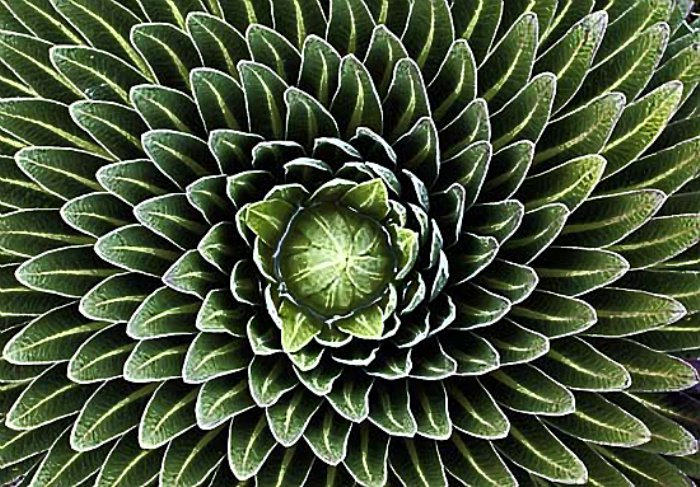

In [39]:
Image ('http://farm5.staticflickr.com/4325/36145700052_84c77ce1ae_b.jpg')

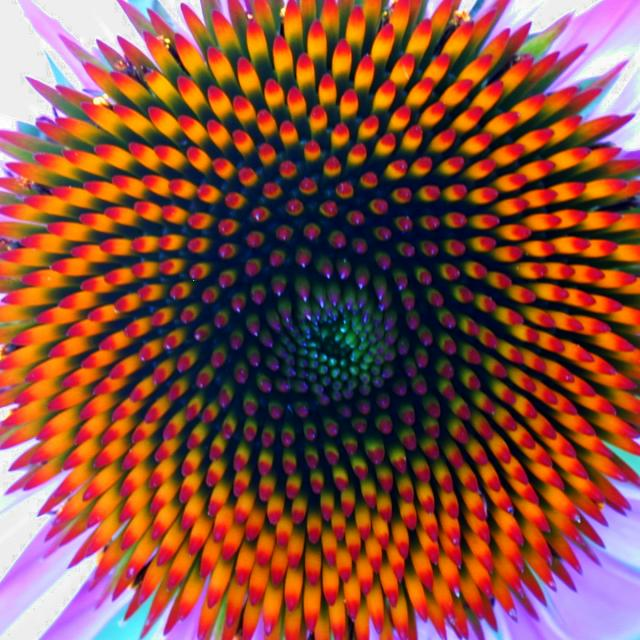

In [40]:
Image ('http://www.maths.surrey.ac.uk/hosted-sites/R.Knott/Fibonacci/coneflower.jpg')

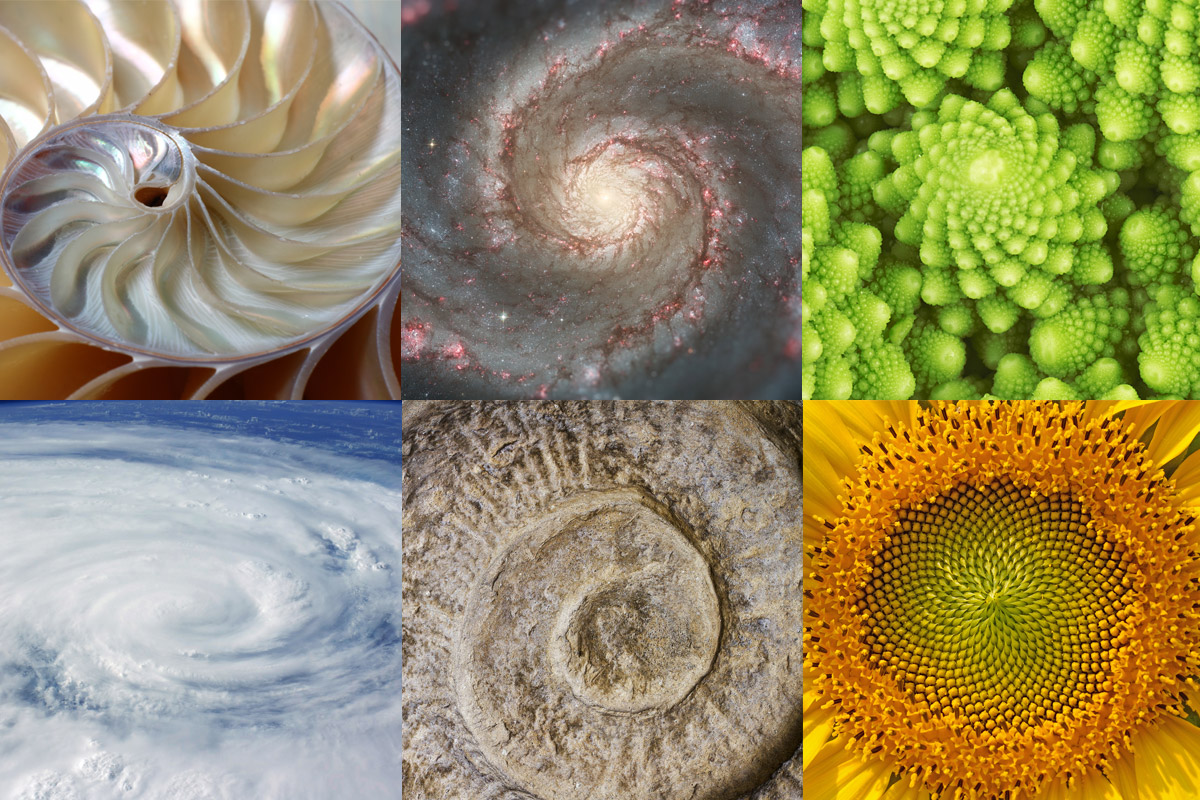

In [41]:
Image ('https://www.designbyday.co.uk/wp-content/uploads/2016/05/golden-ratio-nature.jpg')